Assumption:

The fundamental Naive Bayes assumption is that each feature makes an:

independent
equal
contribution to the outcome.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [2]:
mydata=pd.read_csv("Naive-Bayes-Classifier-Data.csv")

In [3]:
mydata

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [5]:
mydata.dtypes

glucose          int64
bloodpressure    int64
diabetes         int64
dtype: object

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [7]:
mydata.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [9]:
mydata.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
scaler.fit(mydata.drop('diabetes',axis=1))

scaled_features = scaler.transform(mydata.drop('diabetes',axis=1))

In [13]:
mydata_feat = pd.DataFrame(scaled_features,columns=mydata.columns[:-1])
mydata_feat.head()

,glucose,bloodpressure
0,-0.642364,0.622899
1,-0.642364,1.372724
2,0.103438,-1.733695
3,0.103438,0.087309
4,-0.642364,-0.662516


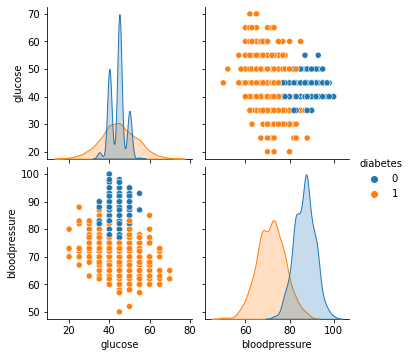

In [15]:
import seaborn as sns

sns.pairplot(mydata,hue='diabetes')

In [16]:
correlation_matrix = mydata.corr().round(2)
correlation_matrix

,glucose,bloodpressure,diabetes
glucose,1.00,-0.16,0.03
bloodpressure,-0.16,1.00,-0.81
diabetes,0.03,-0.81,1.00


<AxesSubplot:>

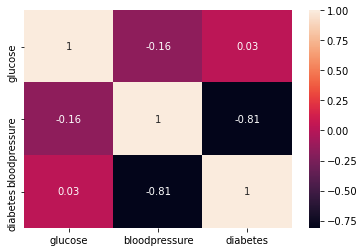

In [17]:
sns.heatmap(data=correlation_matrix, annot=True)

### -------------------------------------Train Test Split------------------

In [18]:
X = mydata.iloc[:, [0, 1]].values
X

array([[40, 85],
       [40, 92],
       [45, 63],
       ...,
       [40, 83],
       [40, 60],
       [45, 82]], dtype=int64)

In [19]:
Y = mydata.iloc[:, 2].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, 
random_state = 0)

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[ 0.08705845,  1.11441825],
       [ 0.08705845, -0.71533994],
       [-0.66812298,  1.32968392],
       ...,
       [-0.66812298,  0.36098841],
       [ 0.84223987,  1.11441825],
       [ 0.84223987, -0.50007427]])

In [26]:
pred_model = GaussianNB().fit(X_train, y_train)
y_pred = pred_model.predict(X_test)

In [27]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [28]:
c=0
for i in range(0,len(y_pred)):
    if(y_pred[i]==y_test[i]):
        c=c+1
        accuracy=c/len(y_pred)
print("Accuracy is")
print(accuracy)

Accuracy is
0.9236947791164659


In [29]:
cm = confusion_matrix(y_test, y_pred)
matrice_conf=pd.DataFrame(cm,index=['positive','négative'],columns=['positive','negative'])

In [30]:
cm

array([[ 98,   6],
       [ 13, 132]], dtype=int64)

In [31]:
matrice_conf

,positive,negative
positive,98,6
négative,13,132


In [32]:
accuracy_score(y_test,y_pred)

0.9236947791164659

In [33]:
import pickle 
pickle.dump(classifier_nb,open('model1.pl',wb))
model =pickle.load (open('modelpk1','rb'))
print(model.predict([1,14]))

NameError: name 'classifier_nb' is not defined